<a href="https://colab.research.google.com/github/sammyfow/cap-comp215/blob/2024.01/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langton's Ant
--------------------------------------------------------------------------------
###Sam Fowler
04/05/2024 to


Modules

In [2]:
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from timeit import timeit
%matplotlib inline
# Configure matplotlib's animation library to work in the browser.
matplotlib.rc('animation', html='jshtml')

Useful function for visualizing a 2D array, as well as the Animation2D class to easily view sequential steps as an animation.

In [3]:
def plot_2D_array(array, axes=None, title='', cmap='Blues', **options):
  axes = axes or plt.gca()
  axes.set_title(title)
  axes.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                   labelbottom=False, labeltop=False, labelleft=False, labelright=False,)
  options = {**dict(interpolation='nearest', origin='upper'), **options}
  axes.imshow(array, cmap=cmap, **options)

In [4]:
class Animation2D:
    """
      Animates any 2D model with a step() method and a draw() method, using matplotlib
      model.step() should take no parameters - just step the model forward one step.
      model.draw() should take 2 parameters, the matpltolib axes to draw on and an integer step number
    """

    def __init__(self, model, frames=50, steps_per_frame=1, figsize=(8, 8)):
        """
        :param model: the simulation object to animate, with step() and draw(axes, step) methods
        :param frames: number of animation frames to generate
        """
        self.model = model
        self.frames = frames
        self.steps_per_frame = steps_per_frame
        self.fig, self.ax = plt.subplots(figsize=figsize)

    def animation_step(self, step):
        """ Step the model forward and draw the plot """
        if step > 0:
          for _ in range(self.steps_per_frame):
            self.model.step()
        self.model.draw(self.ax, step=step)

    def show(self):
        """ return the matplotlib animation object, ready for display """
        anim = animation.FuncAnimation(self.fig, self.animation_step, frames=self.frames)
        plt.close()  # this ensures the last frame is not shown as a separate plot
        return anim

    def animate(self, interval=None):
        """ Animate the model simulation directly in the notebook display block """
        from IPython.display import clear_output
        try:
            for i in range(self.frames):
                clear_output(wait=True)  # clear the IPython display
                self.ax.clear()          # clear old image from the axes (fixes a performance issue)
                plt.figure(self.fig)     # add the figure back to pyplot ** sigh **
                self.animation_step(i)
                plt.show()               # show the current animation frame (pyplot then closes and throws away figure ** sigh **)
                if interval:
                    time.sleep(interval)
        except KeyboardInterrupt:
            pass

A single object that replicates Langton's ant.

In [13]:
class grid:
  def __init__(self, size):
    self.size = size
    self.state = np.zeros((size, size), dtype=np.uint8)



class Ant:
  """
  an ant that moves around a 2D array changing ones to zeros and zeros to ones
  """
  def __init__(self, y, x, direction, grid):
    self.direction = direction  #up=0, down=2, right=1, left=3
    self.grid = grid
    self.x = x % self.grid.size
    self.y = y % self.grid.size

  def turn(self):
    if self.grid.state[self.y, self.x] == 1:
      self.direction = (self.direction + 1) % 4
    elif self.grid.state[self.y, self.x] == 0:
      self.direction = (self.direction - 1) % 4

  def move_forward(self):
    if self.direction == 0:
      self.y = (self.y - 1) % self.grid.size
    elif self.direction == 1:
      self.x = (self.x + 1) % self.grid.size
    elif self.direction == 2:
      self.y = (self.y + 1) % self.grid.size
    elif self.direction == 3:
      self.x = (self.x - 1) % self.grid.size

  def step(self):
    self.turn()
    self.grid.state[self.y, self.x] = self.grid.state[self.y, self.x] * (-1) + 1
    self.move_forward()


  def draw(self, axes=None, step=''):
    axes = axes or plt.gca()
    plot_2D_array(self.grid.state, axes, title='')

  def nth_step(self, steps):
    for step in range(steps):
      self.step()







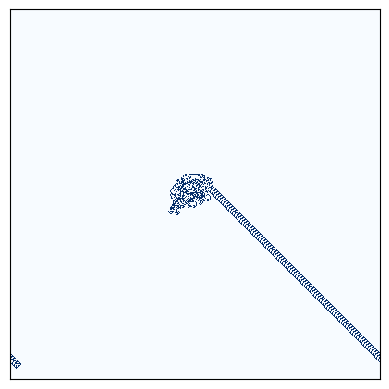

In [21]:
foo = grid(400)
test = Ant(200, 200, 0, foo)
#anim = Animation2D(test, 200, 10)
#anim.animate(interval=0)

test.nth_step(20000)
plot_2D_array(test.grid.state)
test2 = Ant(600, 600, 0, foo)
test2.nth_step(10000)


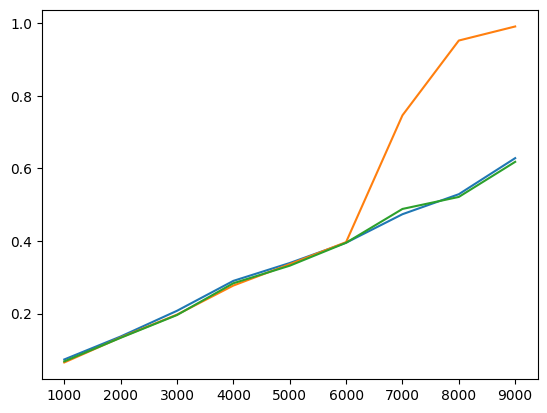

In [20]:
frames = range(1000, 10000, 1000)
hundred = Ant(50, 50, 0, grid(100))
five_hundred = Ant(250, 250, 0, grid(500))
thousand = Ant(500, 500, 0, grid(1000))
times1 = [timeit(lambda: hundred.nth_step(frame), number=10) for frame in frames]
times2 = [timeit(lambda: five_hundred.nth_step(frame), number=10) for frame in frames]
times3 = [timeit(lambda: thousand.nth_step(frame), number=10) for frame in frames]
plt.plot(frames, times1)
plt.plot(frames, times2)
plt.plot(frames, times3)
plt.show()



